In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
from convokit import Corpus, download
corpus = Corpus(filename=download("movie-corpus"))

In [3]:
speakers = corpus.get_speakers_dataframe()
speakers['meta.movie_name'].unique()

array(['10 things i hate about you', '1492: conquest of paradise',
       '15 minutes', '2001: a space odyssey', '48 hrs.',
       'the fifth element', '8mm',
       'a nightmare on elm street 4: the dream master',
       'a nightmare on elm street: the dream child',
       'the atomic submarine', 'affliction', 'air force one',
       'airplane ii: the sequel', 'airplane!', 'alien nation', 'aliens',
       'amadeus', 'an american werewolf in london', 'american madness',
       'american outlaws', 'american psycho', 'antitrust',
       'austin powers: international man of mystery', 'the avengers',
       'bachelor party', 'backdraft', 'bad lieutenant', 'bamboozled',
       'barry lyndon', 'basic', 'big fish', 'birthday girl',
       'black snake moan', 'black rain', 'blade runner',
       'blast from the past', 'blue velvet', 'the boondock saints',
       'bottle rocket', 'the bourne supremacy', 'braveheart',
       'the butterfly effect', 'casablanca', 'cast away',
       'the cider ho

In [67]:
mv_idx = speakers[speakers['meta.movie_name'] == 'toy story']['meta.movie_idx'].iloc[0]

In [68]:
utt = corpus.get_utterances_dataframe(selector = lambda x: x.retrieve_meta('movie_id')==mv_idx).reset_index()

In [69]:
utt = utt.sort_values(by='id')

In [70]:
utt_speaker = utt.merge(
    speakers['meta.character_name'], left_on='speaker', right_index=True
)
utt_speaker = utt_speaker.merge(
    utt_speaker, left_on='reply_to', right_on='id', how='left', suffixes=(None, '_replied_to')
)

utt_speaker

,id,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors,meta.character_name,id_replied_to,timestamp_replied_to,text_replied_to,speaker_replied_to,reply_to_replied_to,conversation_id_replied_to,meta.movie_id_replied_to,meta.parsed_replied_to,vectors_replied_to,meta.character_name_replied_to
0,L621130,None,Wow! Cool!,u8534,None,L621130,m579,"[{'rt': 3, 'toks': [{'tok': 'Wow', 'tag': 'UH'...",[],ANDY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L621132,None,"Oh, this looks GREAT, Mom!",u8534,L621131,L621130,m579,"[{'rt': 3, 'toks': [{'tok': 'Oh', 'tag': 'UH',...",[],ANDY,L621131,None,Whadda ya think?,u8540,L621130,L621130,m579,"[{'rt': 2, 'toks': [{'tok': 'Whadda', 'tag': '...",[],MRS. DAVIS
2,L621133,None,Can we leave this up 'til we move?,u8534,None,L621133,m579,"[{'rt': 2, 'toks': [{'tok': 'Can', 'tag': 'MD'...",[],ANDY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L621135,None,Yeah!,u8534,L621134,L621133,m579,"[{'rt': 0, 'toks': [{'tok': 'Yeah', 'tag': 'UH...",[],ANDY,L621134,None,"Well, sure, we can leave it up.",u8540,L621133,L621133,m579,"[{'rt': 6, 'toks': [{'tok': 'Well', 'tag': 'UH...",[],MRS. DAVIS
4,L621137,None,Okay.,u8534,L621136,L621133,m579,"[{'rt': 0, 'toks': [{'tok': 'Okay', 'tag': 'UH...",[],ANDY,L621136,None,Now go get Molly. Your friends are going to b...,u8540,L621135,L621133,m579,"[{'rt': 1, 'toks': [{'tok': 'Now', 'tag': 'RB'...",[],MRS. DAVIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,L621606,None,Hey!!,u8538,None,L621606,m579,"[{'rt': 0, 'toks': [{'tok': 'Hey', 'tag': 'UH'...",[],HANNAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,L621608,None,No she's NOT --,u8538,L621607,L621606,m579,"[{'rt': 2, 'toks': [{'tok': 'No', 'tag': 'UH',...",[],HANNAH,L621607,None,She's sick!,u8543,L621606,L621606,m579,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],SID
399,L621610,None,NO-O-O... Don't touch her! NO!,u8538,L621609,L621606,m579,"[{'rt': 8, 'toks': [{'tok': 'NO', 'tag': 'JJ',...",[],HANNAH,L621609,None,I'll have to perform one of my...operations!,u8543,L621608,L621606,m579,"[{'rt': 2, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],SID
400,L621615,None,"Sid, give her back! Give her back now! I'm t...",u8538,None,L621615,m579,"[{'rt': 2, 'toks': [{'tok': 'Sid', 'tag': 'NNP...",[],HANNAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
from distill_bert import DistillBert
from classifier import SentimentClassifier

In [72]:
db = DistillBert()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [73]:
df = utt_speaker.copy().sort_values(by='id').reset_index(drop=True)
df['order'] = np.arange(len(df))

In [74]:
f = db.transform(df)

batch number 0 out of 0 done!


In [75]:
model_A = SentimentClassifier()
model_A.load(Path('boosters')/'A')

model_V = SentimentClassifier()
model_V.load(Path('boosters')/'V')

model_D = SentimentClassifier()
model_D.load(Path('boosters')/'D')

loading model
loading model
loading model


In [76]:
df['A_pred'] = model_A.predict(f)
df['V_pred'] = model_V.predict(f)
df['D_pred'] = model_D.predict(f)

In [141]:
df.head(1)

,id,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors,meta.character_name,...,reply_to_replied_to,conversation_id_replied_to,meta.movie_id_replied_to,meta.parsed_replied_to,vectors_replied_to,meta.character_name_replied_to,order,A_pred,V_pred,D_pred
0,L621130,None,wow cool,u8534,None,L621130,m579,"[{'rt': 3, 'toks': [{'tok': 'Wow', 'tag': 'UH'...",[],ANDY,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3.397855,3.679753,3.189299


# Analisi del protagonista

In [78]:
df.groupby('speaker')['id'].count().sort_values()

speaker
u8535      8
u8538      9
u8542      9
u8537     15
u8543     16
u8544     18
u8540     22
u8541     22
u8534     27
u8539     32
u8536     75
u8545    149
Name: id, dtype: int64

In [79]:
spk_id = 'u8545'
df_spk = df[df.speaker==spk_id].fillna('None')

Text(0.5, 0.98, 'TOY STORY - Woody emotional profile')

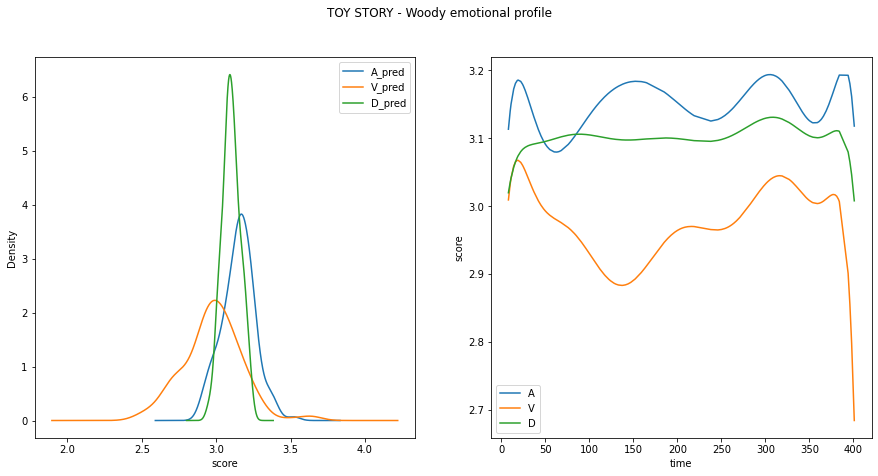

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 7])
df_spk[['A_pred', 'V_pred', 'D_pred']].plot.density(ax=ax1)

trend = np.polyfit(df_spk.order, df_spk.A_pred, 10)
trendpoly = np.poly1d(trend) 
ax2.plot(df_spk.order,trendpoly(df_spk.order), label='A')

trend = np.polyfit(df_spk.order, df_spk.V_pred, 10)
trendpoly = np.poly1d(trend) 
ax2.plot(df_spk.order,trendpoly(df_spk.order), label='V')

trend = np.polyfit(df_spk.order, df_spk.D_pred, 10)
trendpoly = np.poly1d(trend) 
ax2.plot(df_spk.order,trendpoly(df_spk.order), label='D')

ax2.legend()

ax1.set_xlabel('score')

ax2.set_ylabel('score')
ax2.set_xlabel('time')

fig.suptitle('TOY STORY - Woody emotional profile')

In [159]:
# extract full conversation the maximum V score
max_index = df_spk.iloc[df_spk.V_pred.argmax()]
convo = corpus.get_conversation(max_index.conversation_id)
convo.print_conversation_structure(lambda utt: f"{utt.speaker.meta['character_name']}: {utt.text}")

WOODY: Well, thanks for the ride.
    BUZZ: Look out!!


In [160]:
min_index = df_spk.iloc[df_spk.V_pred.argmin()]
convo = corpus.get_conversation(min_index.conversation_id)
convo.print_conversation_structure(lambda utt: f"{utt.speaker.meta['character_name']}: {utt.text}")

BUZZ: Why is that soldier strapped to an explosive device?
    WOODY: That's why.  Sid.
        BUZZ: Sure is a hairy fellah.
            WOODY: No!  No, that's Scud, you idiot!


# Analisi interazione protagonista e personaggio secondario

In [95]:
cops = df_spk.groupby('meta.character_name_replied_to')['id'].count().sort_values(ascending=False).index.tolist()
cops

['None',
 'BUZZ',
 'MR. POTATO HEAD',
 'SLINKY',
 'REX',
 'SARGENT',
 'HAMM',
 'BO PEEP',
 'SID']

BUZZ
          A_pred     V_pred     D_pred
count  46.000000  46.000000  46.000000
mean    3.151775   2.937122   3.107535
std     0.110864   0.222684   0.059084
min     2.941394   2.476942   2.994681
25%     3.071104   2.788550   3.066408
50%     3.157688   2.967725   3.109996
75%     3.228110   3.073294   3.146720
max     3.390845   3.636084   3.228661
MR. POTATO HEAD
         A_pred    V_pred    D_pred
count  9.000000  9.000000  9.000000
mean   3.176285  2.941847  3.150605
std    0.060728  0.179195  0.058075
min    3.058962  2.699915  3.069773
25%    3.157521  2.806047  3.100812
50%    3.177563  2.925605  3.179781
75%    3.224855  3.049597  3.199027
max    3.240128  3.222777  3.219941
SLINKY
         A_pred    V_pred    D_pred
count  8.000000  8.000000  8.000000
mean   3.106810  2.929097  3.070388
std    0.106525  0.152126  0.071064
min    2.940752  2.630243  2.946182
25%    3.033929  2.880990  3.040068
50%    3.135503  2.927660  3.077001
75%    3.175771  3.021824  3.121797
max    3.

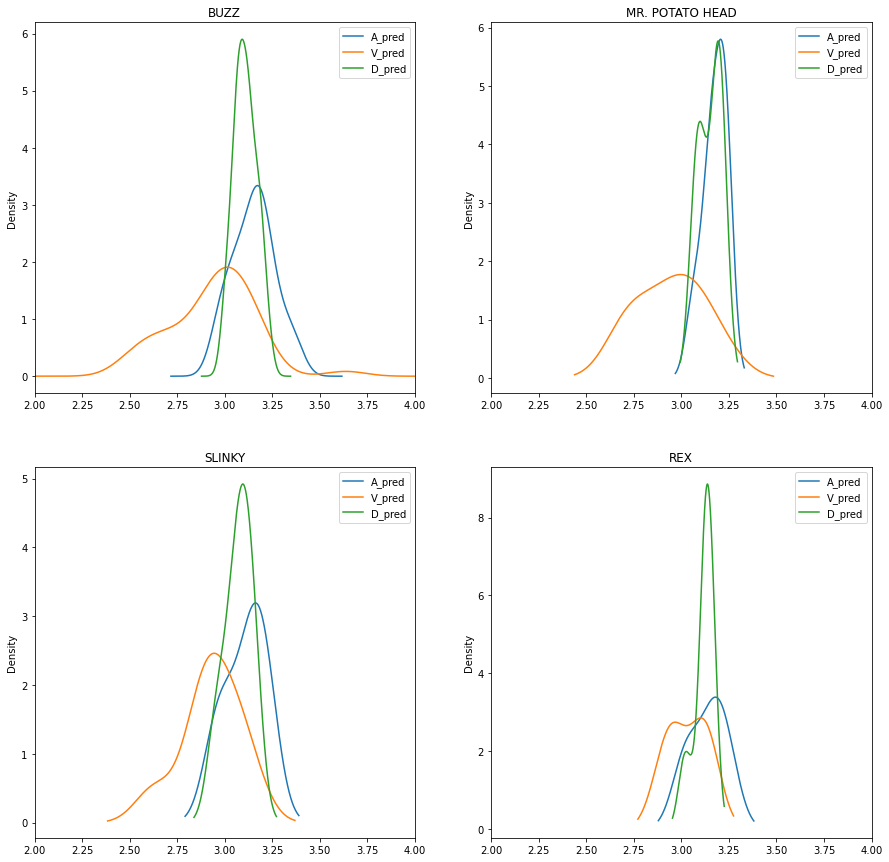

In [167]:
count = 0
fig, axs = plt.subplots(2, 2, figsize=[15, 15])
axs = axs.flatten()
for cop in cops:
    if count > 3:
        break
    if cop != 'None':
        df_cop = df_spk[df_spk['meta.character_name_replied_to']==cop].copy()
        df_cop[['A_pred', 'V_pred', 'D_pred']].plot.density(ax=axs[count])
        axs[count].set_title(cop)
        axs[count].set_xlim(2.0, 4.0)
        
        d = df_cop[['A_pred', 'V_pred', 'D_pred']].describe()
        print(cop)
        print(d.to_string())
        
        count += 1


In [164]:
axs.flatten()

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:title={'center':'REX'}, ylabel='Density'>],
      dtype=object)